In [1]:
import csv, sys
csv.field_size_limit(sys.maxsize)
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from tqdm import tqdm, tqdm_notebook

In [2]:
import re
from nltk.corpus import stopwords
def clean_text(text):
    output = ""
    text = text.replace("\n", " ").lower()
    text = re.sub(r'[^\w\s]',' ',text)
    #for word in text:
        #if word not in stopwords.words("english"):
            #output = output + " " + word
    return text.strip().replace("  ", " ")

In [ ]:
FILE_DIR = "news.csv"
labels, raw_texts = [], []

classes = ["fake", "satire", "bias", "conspiracy", "state", "junksci", "hate", "clickbait", "unreliable", "political", "reliable"]

with open(FILE_DIR, encoding='utf-8', errors='ignore') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    count = 0
    for row in tqdm_notebook(readCSV, total=9408908):
        if count == 0:
            count += 1
            pass
        else:
            try:
                label = row[3]
                if label in classes:
                    text = clean_text(row[5])
                    if len(text.split(" ")) < 1000:
                        labels.append(label)
                        raw_texts.append(text)
            except:
                print(row)

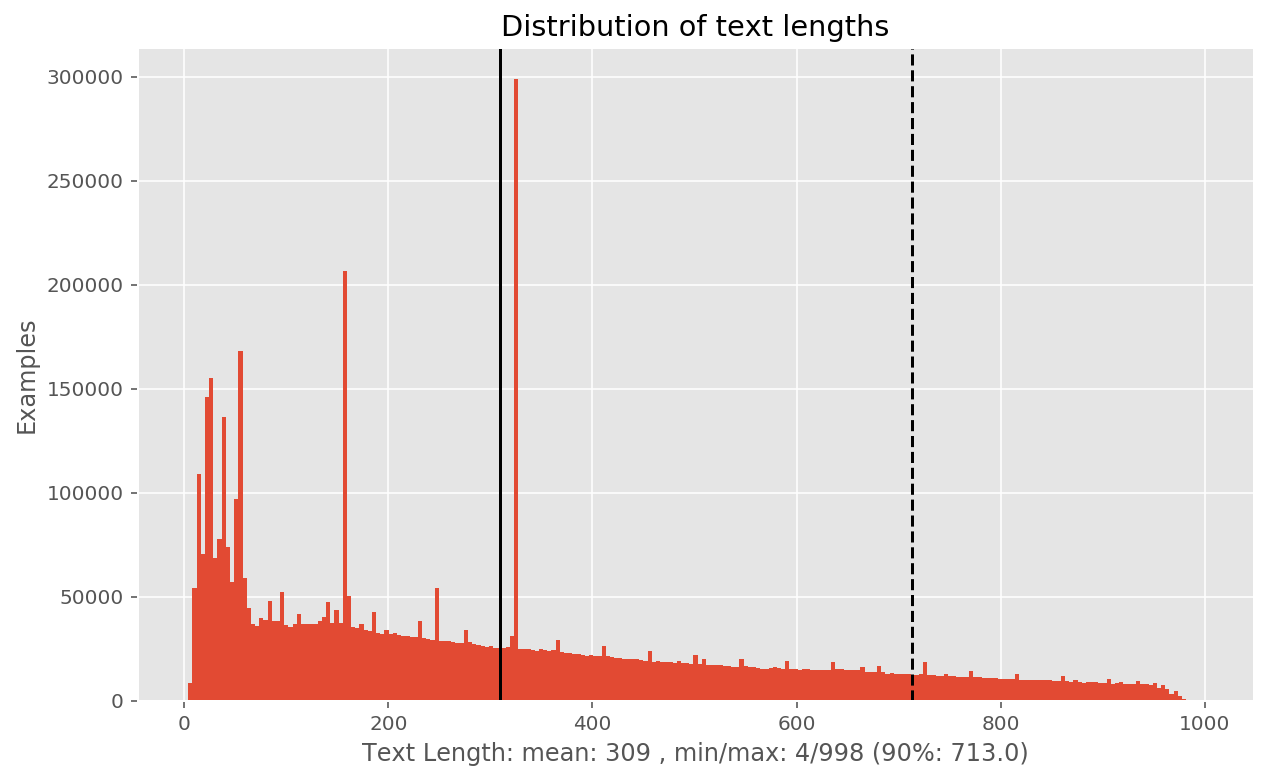

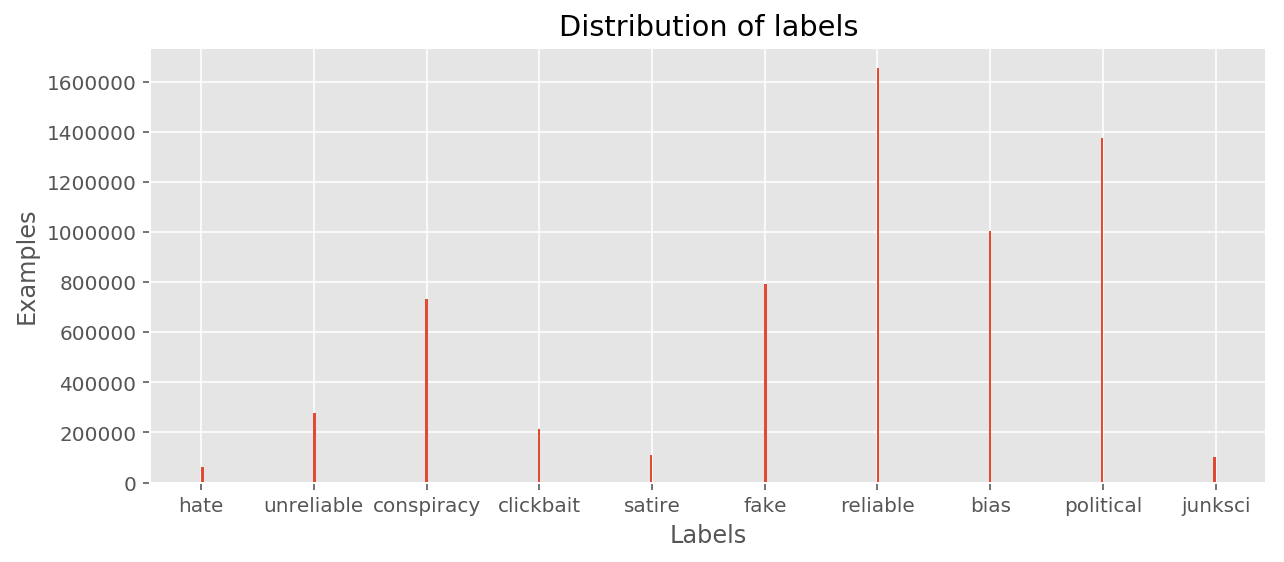

In [5]:
plt.style.use('ggplot')
# distribution of text lengths
lengths = np.array([len(row.split(" ")) for row in texts])
summary = "mean: "+str(int(np.mean(lengths)))+" , min/max: "+str(np.min(lengths))+"/"+str(np.max(lengths))+" (90%: "+ str(round(np.percentile(lengths, 90), 2)) + ")"
plt.figure(1, figsize=(10,6))
plt.hist(lengths, bins='auto')
plt.title("Distribution of text lengths")
#plt.xlim(5, 1000)
plt.xlabel("Text Length: " + summary); plt.ylabel("Examples")
plt.axvline(np.mean(lengths), ls="-", color="k")
plt.axvline(np.percentile(lengths, 90), ls="--", color="k")
plt.show()
# distribution of label counts
labels = np.array(labels)
plt.figure(2, figsize=(10,4))
plt.hist(labels, bins='auto')
plt.title("Distribution of labels")
plt.xlabel("Labels"); plt.ylabel("Examples")
plt.show()

In [ ]:
import pickle
with open('sst_train_texts.pickle', 'wb') as handle:
    pickle.dump(raw_texts, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('sst_train_labels.pickle', 'wb') as handle:
    pickle.dump(labels, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle
with open('sst_train_texts.pickle', 'rb') as handle:
    raw_texts = pickle.load(handle)

In [ ]:
cleaned_text = []
for text in tqdm(raw_texts):
    cleaned_text.append(clean_text(text))

In [ ]:
with open('cleaned_texts.pickle', 'wb') as handle:
    pickle.dump(cleaned_text, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [4]:
import pickle
with open('cleaned_texts.pickle', 'rb') as handle:
    texts = pickle.load(handle)
    
with open('labels.pickle', 'rb') as handle:
    labels = pickle.load(handle)